In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Data for this notebook has been pulled and used from the NYT GitHub repo that is updated daily <b>[here](https://github.com/nytimes/covid-19-data)</b>

# County-level Exploration - Buncombe & Philadelphia

In [2]:
filepath = '/Users/sinasinai/git/coronavirus/covid-19-data/us-counties.csv'
df = pd.read_csv(filepath)

In [3]:
df['date'] = pd.to_datetime(df.date)
df = df.set_index('date')

In [4]:
buncombe = df.loc[(df.county == 'Buncombe') & (df.state == 'North Carolina')].copy()
philly = df.loc[(df.county == 'Philadelphia') & (df.state == 'Pennsylvania')].copy()

In [5]:
buncombe['day_lag_cases'] = buncombe.shift(periods=1).cases
buncombe['daily_new_cases'] = buncombe.cases - buncombe.day_lag_cases
philly['day_lag_cases'] = philly.shift(periods=1).cases
philly['daily_new_cases'] = philly.cases - philly.day_lag_cases
buncombe['daily_avg_7d'] = buncombe.daily_new_cases.rolling(7).mean()
philly['daily_avg_7d'] = philly.daily_new_cases.rolling(7).mean()

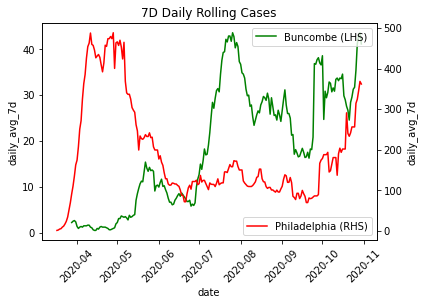

In [6]:
fig = sns.lineplot(x=buncombe.index,y=buncombe.daily_avg_7d,label='Buncombe (LHS)',color='Green')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

fig2 = fig.twinx()
sns.lineplot(x=philly.index,y=philly.daily_avg_7d,ax=fig2,label='Philadelphia (RHS)',color='Red')
plt.legend(loc='lower right')

fig.set_title('7D Daily Rolling Cases')


plt.show()

# National Cases

In [2]:
us = pd.read_csv('us.csv')

In [3]:
us['date'] = pd.to_datetime(us.date)
us = us.set_index('date')

In [4]:
us['daily_lag_cases'] = us.shift(periods=1).cases
us['daily_new_cases'] = us.cases - us.daily_lag_cases

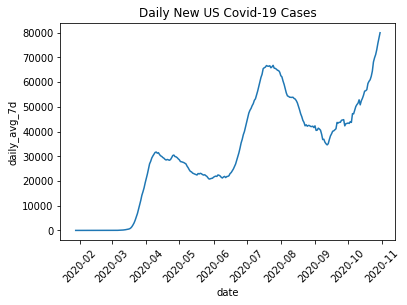

In [5]:
us['daily_avg_7d'] = us.daily_new_cases.rolling(7).mean()
fig = sns.lineplot(x=us.index,y=us.daily_avg_7d)
fig.set_title('Daily New US Covid-19 Cases')
plt.xticks(rotation=45)
plt.show()

In [6]:
us['lag_daily_new_cases'] = us.shift(periods=1).daily_new_cases
us['second_diff_new_cases'] = us.daily_new_cases - us.lag_daily_new_cases

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

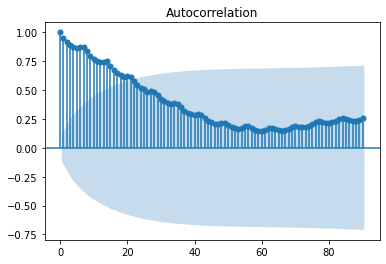

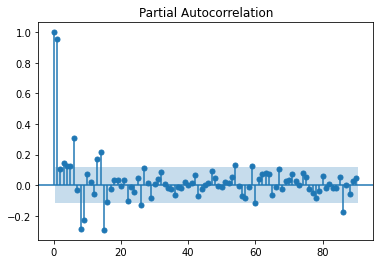

In [8]:
plot_acf(us.daily_new_cases.to_numpy(),missing="drop",lags=90,fft=False)
plot_pacf(us.daily_new_cases.dropna().to_numpy(),lags=90)
plt.show()

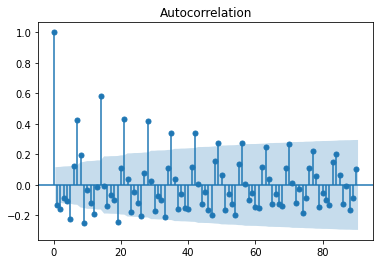

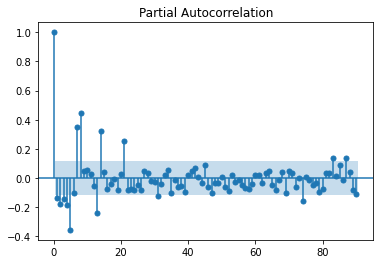

In [9]:
plot_acf(us.second_diff_new_cases.to_numpy(),missing="drop",lags=90,fft=False)
plot_pacf(us.second_diff_new_cases.dropna().to_numpy(),lags=90)
plt.show()

# Forecasting - Basic ARIMA

Following this <b>[tutorial](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b) </b>

In [10]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA as arima
import statsmodels.api as sm
import itertools

In [23]:
p = range(21,22)
d = range(1,2)
q = range(0,1)
pdq = list(itertools.product(p, d, q))

ps = range(1,5)
ds = range(1,2)
qs = range(0,1)
season = range(91,92)
seasonal_pdq = list(itertools.product(ps, ds, qs, season))

In [24]:
seasonal_grid = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(us.daily_new_cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print(f"Param combo {param}: {param_seasonal}: {results.aic}")
            seasonal_grid = seasonal_grid[str(param) + str(seasonal_pdq)] = results.aic
        
        except:
            continue

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Param combo (21, 1, 0): (1, 1, 0, 91): 1627.9103371302458


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Param combo (21, 1, 0): (2, 1, 0, 91): 48.0


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Param combo (21, 1, 0): (3, 1, 0, 91): 50.0


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Param combo (21, 1, 0): (4, 1, 0, 91): 52.0


In [16]:
# [g for g in seasonal_grid.keys() if seasonal_grid[g] == min(seasonal_grid.values())]

In [26]:
mod = sm.tsa.statespace.SARIMAX(us.daily_new_cases,
                                            order=(21,1,0),
                                            seasonal_order=(2, 1, 0, 91),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [27]:
results.summary()

/usr/local/lib/python3.8/site-packages/statsmodels/tools/eval_measures.py:406: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/usr/local/lib/python3.8/site-packages/statsmodels/tools/eval_measures.py:431: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3103: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Later subset of data for variable %d'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:464: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWar

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                     daily_new_cases   No. Observations:                  284
Model:             SARIMAX(21, 1, 0)x(2, 1, 0, 91)   Log Likelihood                   0.000
Date:                             Sun, 01 Nov 2020   AIC                             48.000
Time:                                     02:00:02   BIC                                nan
Sample:                                 01-21-2020   HQIC                               nan
                                      - 10-30-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4834         -0        inf      0.000      -0.483      -0.483
ar.L2         -0.1121         -0        inf      0.000      -0.112      -0.112
ar.L3          0.0760         -0       -inf      0.000       0.076       0.076
ar.L4         -0.1191         -0        inf      0.000      -0.119      -0.119
ar.L5         -0.0184         -0        inf      0.000      -0.018      -0.018
ar.L6          0.0735         -0       -inf      0.000       0.074       0.074
ar.L7          0.2476         -0       -inf      0.000       0.248       0.248
ar.L8          0.1936         -0       -inf      0.000       0.194       0.194
ar.L9         -0.0590         -0        inf      0.000      -0.059      -0.059
ar.L10         0.0018         -0       -inf      0.000       0.002       0.002
ar.L11         0.0201         -0       -inf      0.000       0.020       0.020
ar.L12        -0.0595         -0        inf      0.000      -0.059      -0.059
ar.L13        -0.2326         -0        inf      0.000      -0.233      -0.233
ar.L14         0.3084         -0       -inf      0.000       0.308       0.308
ar.L15         0.1548         -0       -inf      0.000       0.155       0.155
ar.L16        -0.0164         -0        inf      0.000      -0.016      -0.016
ar.L17        -0.0684         -0        inf      0.000      -0.068      -0.068
ar.L18         0.0354         -0       -inf      0.000       0.035       0.035
ar.L19        -0.0543         -0        inf      0.000      -0.054      -0.054
ar.L20         0.0703         -0       -inf      0.000       0.070       0.070
ar.L21         0.1068         -0       -inf      0.000       0.107       0.107
ar.S.L91       0.2343         -0       -inf      0.000       0.234       0.234
ar.S.L182      1.0342         -0       -inf      0.000       1.034       1.034
sigma2       1.82e+07         -0       -inf      0.000    1.82e+07    1.82e+07
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

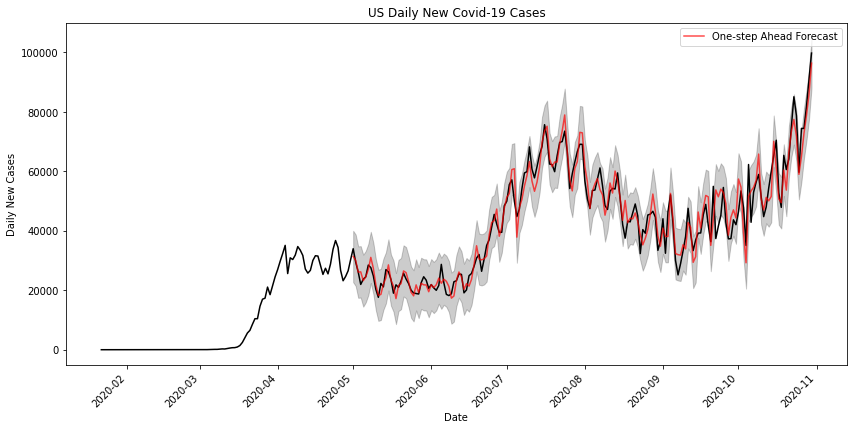

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2020-05-01'))
pred_ci = pred.conf_int()

fig = sns.lineplot(x=us.index,y=us.daily_new_cases,color='black')
fig.set_title('US Daily New Covid-19 Cases')

pred.predicted_mean.plot(ax=fig, label='One-step Ahead Forecast', alpha=.7, figsize=(14, 7),color='red')
fig.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.xticks(rotation=45)
fig.set_xlabel('Date')
fig.set_ylabel('Daily New Cases')
plt.legend()
plt.show()

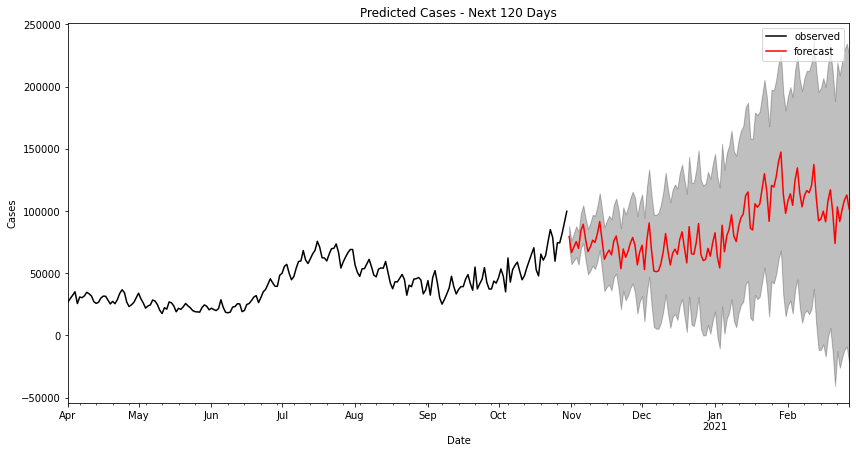

In [33]:
pred_uc = results.get_forecast(steps=120)
pred_ci = pred_uc.conf_int()
ax = us[pd.to_datetime('2020-04-01'):].daily_new_cases.plot(label='observed', figsize=(14, 7),color='black')
pred_uc.predicted_mean.plot(ax=ax, label='forecast',color='red')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('Predicted Cases - Next 120 Days')
plt.legend()
plt.show()